# 4- Destek Vektör Makineleri (Support Vector Machines)

## TEORİ

**Amaç, iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.**

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [16]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabetes = pd.read_csv(url)
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


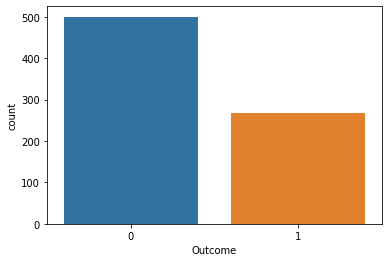

In [7]:
sns.countplot(df['Outcome']);

In [9]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu ve Tahminleme (Doğrusal SVC)

In [10]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
svc = SVC(kernel = 'linear').fit(X_train, y_train)
svc

SVC(kernel='linear')

In [11]:
svc.score(X_train, y_train) # modelin anlamlılık degeri

0.7736156351791531

In [14]:
# tahminleme
y_pred = svc.predict(X_test)
skor = accuracy_score(y_test, y_pred)
skor # modelin dogruluk skoru

0.7532467532467533

In [15]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Model Tuning

In [17]:
# optimum C degerinin elde edilmesi
svc_params = {'C': np.arange(1, 10)}

svc_cv = GridSearchCV(svc, 
                      svc_params,
                      cv = 10, n_jobs = -1,
                      verbose = 2).fit(X_train, y_train)
svc_cv # (5-10 dk. sürebilir!)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ................................................C=1; total time=   5.5s
[CV] END ................................................C=1; total time=   6.4s
[CV] END ................................................C=1; total time=   6.5s
[CV] END ................................................C=1; total time=   6.9s
[CV] END ................................................C=1; total time=   8.0s
[CV] END ................................................C=1; total time=   9.3s
[CV] END ................................................C=1; total time=  10.9s
[CV] END ................................................C=1; total time=   6.8s
[CV] END ................................................C=1; total time=   7.2s
[CV] END ................................................C=1; total time=  13.8s
[CV] END ................................................C=2; total time=  11.0s
[CV] END .......................................

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [18]:
svc_cv.best_params_ # optimum C degeri

{'C': 8}

In [19]:
# optimum deger ile model kurulumu
svc_linear = SVC(kernel = 'linear', C = 8).fit(X_train, y_train)
svc_linear

SVC(C=8, kernel='linear')

In [41]:
# tahminleme
y_pred = svc_linear.predict(X_test)
dogSkor_linear = accuracy_score(y_test, y_pred)
dogSkor_linear # dogrulanmıs skor

0.7727272727272727

In [21]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### Model Kurulumu ve Tahminleme (Doğrusal Olmayan SVC)

In [27]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
svc2 = SVC(kernel = 'rbf').fit(X_train, y_train)
svc2

SVC()

In [28]:
svc2.score(X_train, y_train) # modelin anlamlılık degeri

0.7687296416938111

In [37]:
# tahminleme
y_pred = svc2.predict(X_test)
skor_rbf = accuracy_score(y_test, y_pred)
skor_rbf # modelin dogruluk skoru

0.7662337662337663

In [30]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



### Model Tuning

In [31]:
# optimum C degerinin elde edilmesi
svc_params = {'C': np.arange(1, 10)}

svc_cv2 = GridSearchCV(svc2, 
                      svc_params,
                      cv = 10, n_jobs = -1,
                      verbose = 2).fit(X_train, y_train)
svc_cv2 # (5-10 dk. sürebilir!)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=2; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [32]:
svc_cv2.best_params_ # optimum C degeri

{'C': 7}

In [36]:
# optimum deger ile model kurulumu
svc_rbf = SVC(kernel = 'rbf', C = 7).fit(X_train, y_train)
svc_rbf

SVC(C=7)

In [39]:
# tahminleme
y_pred = svc_rbf.predict(X_test)
dogSkor_rbf = accuracy_score(y_test, y_pred) # modelin dogruluk skoru
dogSkor_rbf

0.7662337662337663

In [40]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Destek Vektör Makine Sınıflandırıcı modeli kullanıldı.
* Doğrusal modelin optimum dogruluk skoru: **0.7727272727272727**
* Doğrusal olmayan modelin optimum dogruluk skoru: **0.7662337662337663**